<a href="https://colab.research.google.com/github/spandit98/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_Soumyadeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

In [109]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
#load data
netflix_df=pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [112]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [113]:
netflix_df.shape

(7787, 12)

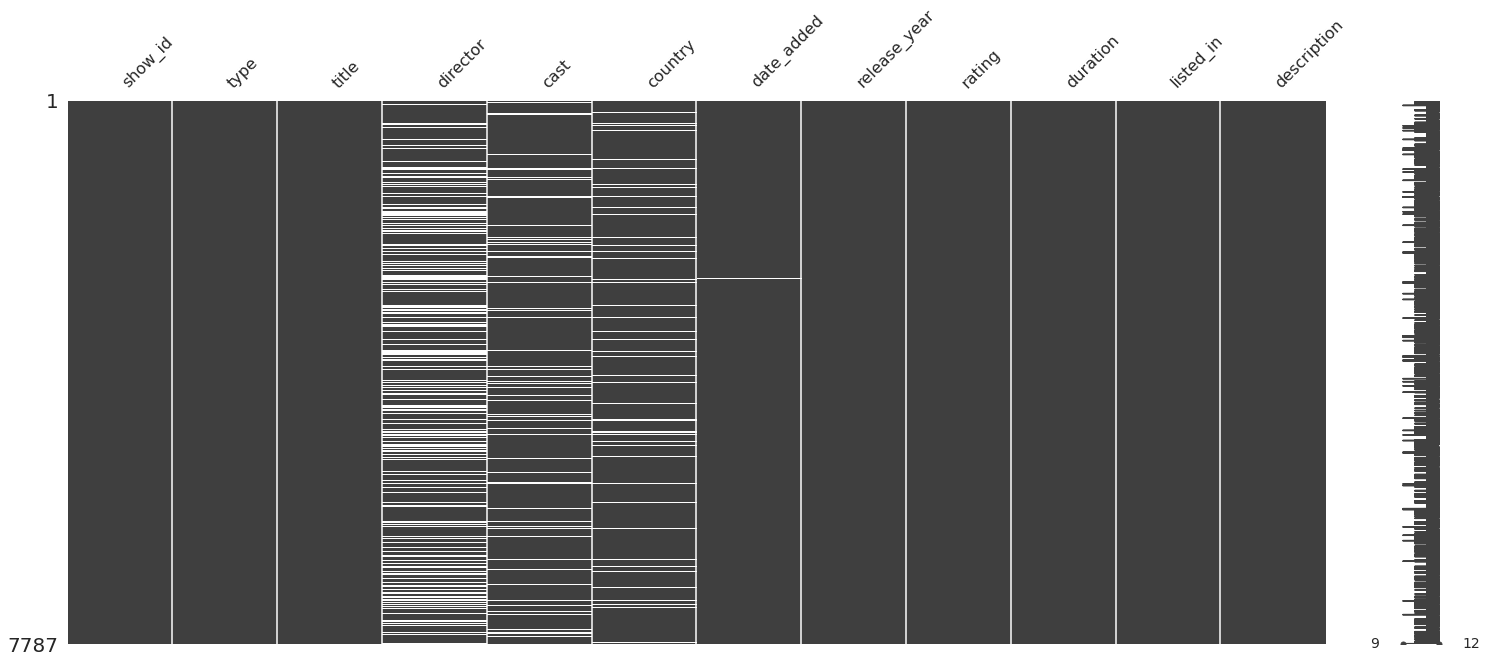

In [114]:
# Visualize missing values as a matrix
msno.matrix(netflix_df);

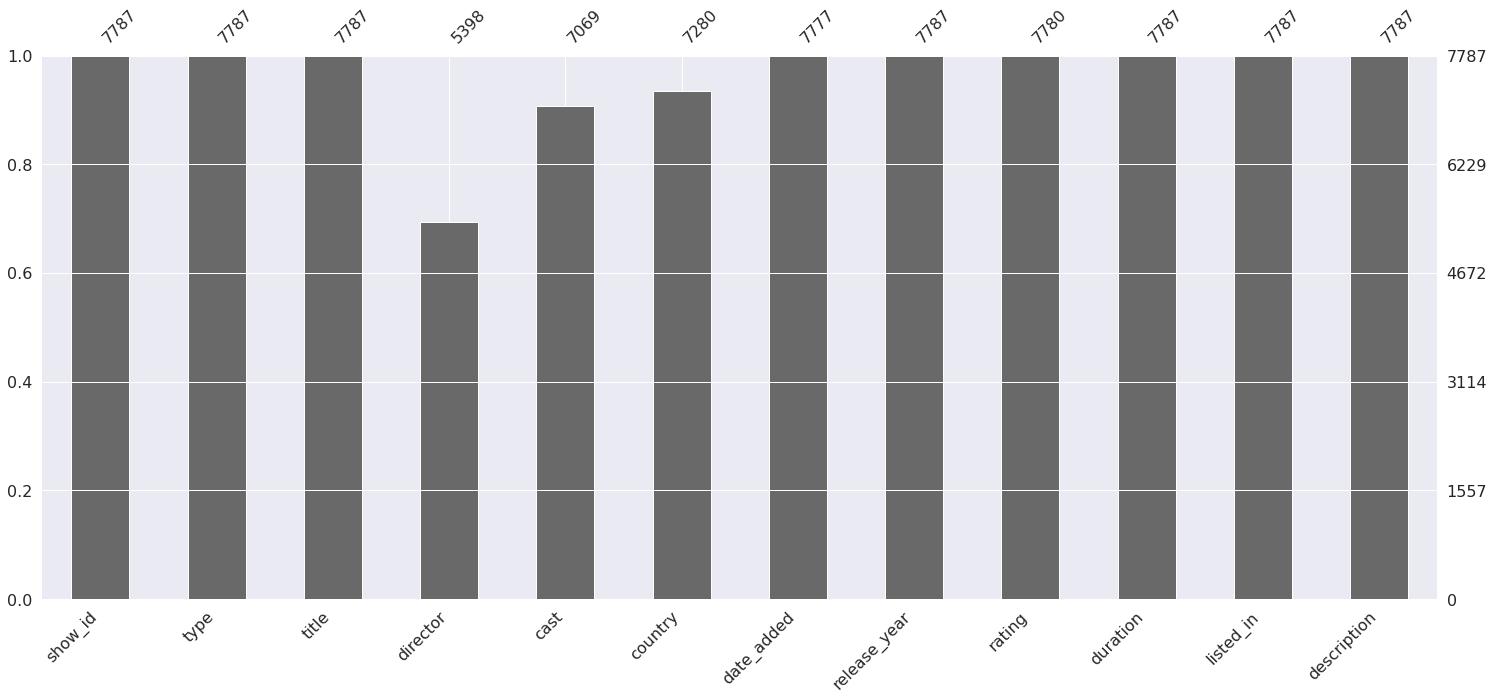

In [115]:
msno.bar(netflix_df);

In [116]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [117]:
netflix_df["director"].fillna("Unknown", inplace = True)
netflix_df["cast"].fillna("Unknown", inplace = True)
netflix_df["country"].fillna("Unknown", inplace = True)

In [118]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [119]:
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [120]:
netflix_df.dropna(inplace=True)

In [121]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [122]:
duplicates = netflix_df[netflix_df.duplicated()]

In [123]:

netflix_df.duplicated().sum()

0

In [124]:
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [125]:
netflix_df.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
principal_country    object
dtype: object

In [126]:
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[-1])
netflix_df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [127]:
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])
netflix_df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [128]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['age_rating'] = netflix_df['rating'].replace('rating_ages')
netflix_df['age_rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [129]:
# type should be a category
netflix_df['type'] = pd.Categorical(netflix_df['type'])

# age_ratingis another category (4 classes)
netflix_df['age_rating'] = pd.Categorical(netflix_df['age_rating'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])

In [130]:
netflix_df.dtypes

show_id                object
type                 category
title                  object
director               object
cast                   object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
principal_country      object
year_added              int64
month_added            object
age_rating           category
dtype: object

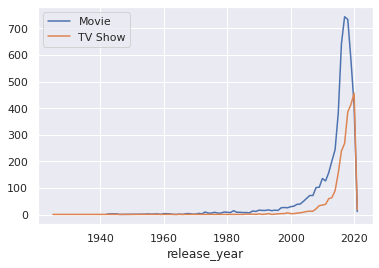

In [131]:
# show grow of type
movie = netflix_df.loc[netflix_df['type'] == 'Movie']
tv = netflix_df.loc[netflix_df['type'] == 'TV Show']
movie.groupby('release_year').show_id.count().plot()
tv.groupby('release_year').show_id.count().plot()
plt.legend(['Movie','TV Show'])

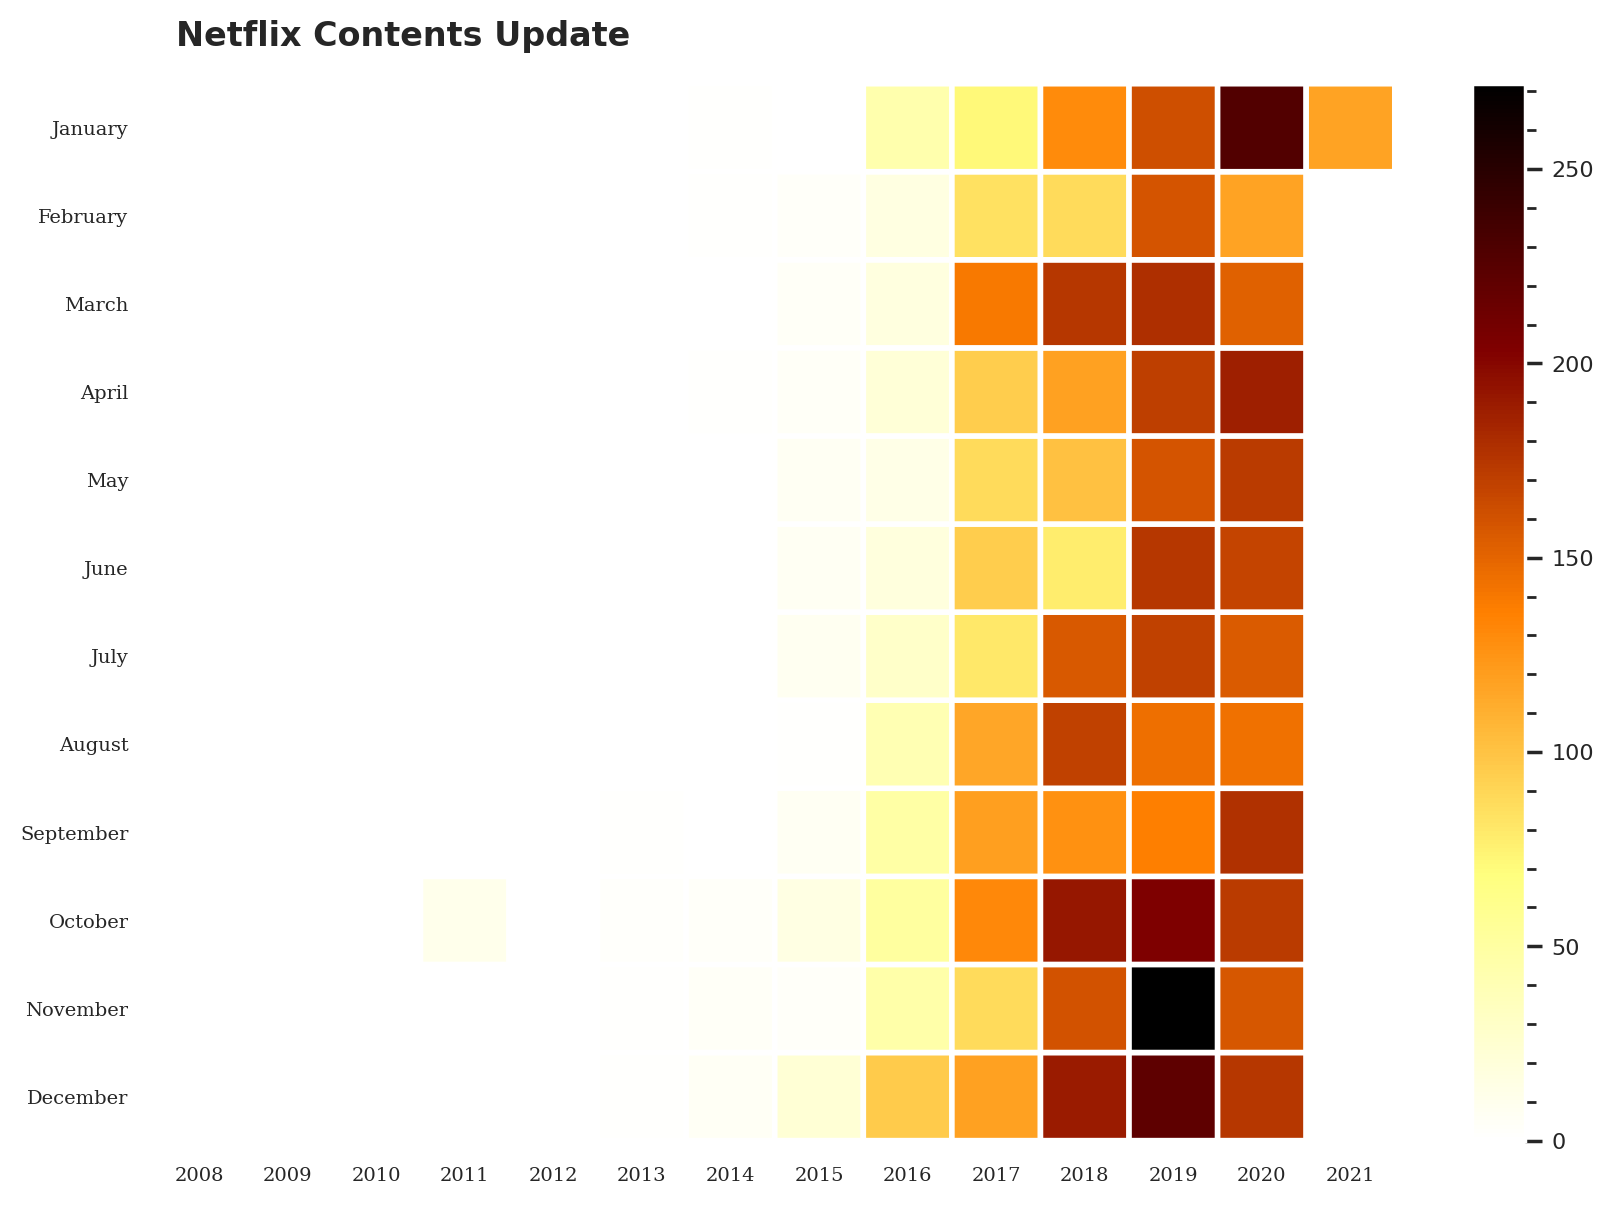

In [132]:
netflix_date = netflix_df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

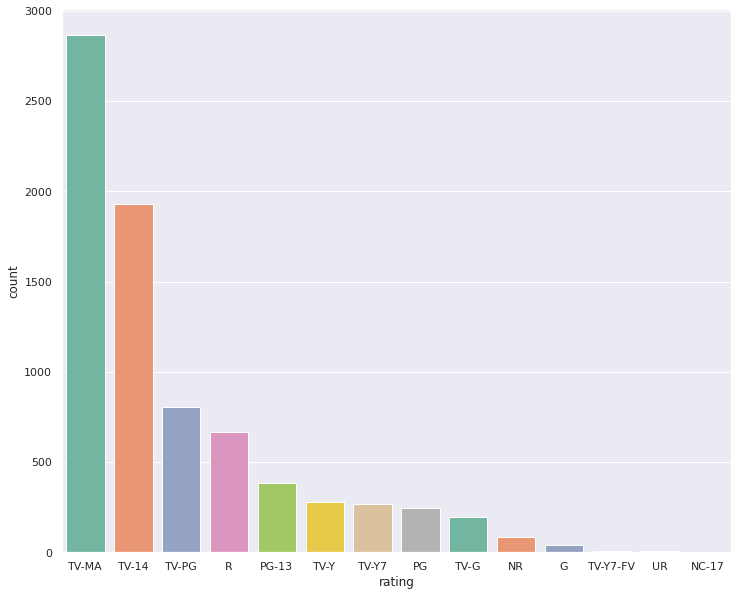

In [133]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2", order=netflix_df['rating'].value_counts().index[0:15])

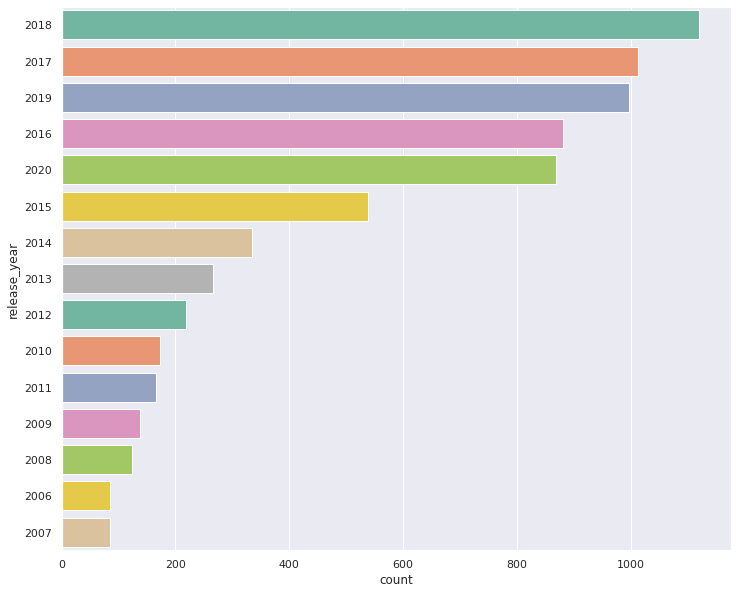

In [134]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_df, palette="Set2", order=netflix_df['release_year'].value_counts().index[0:15])

In [135]:
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

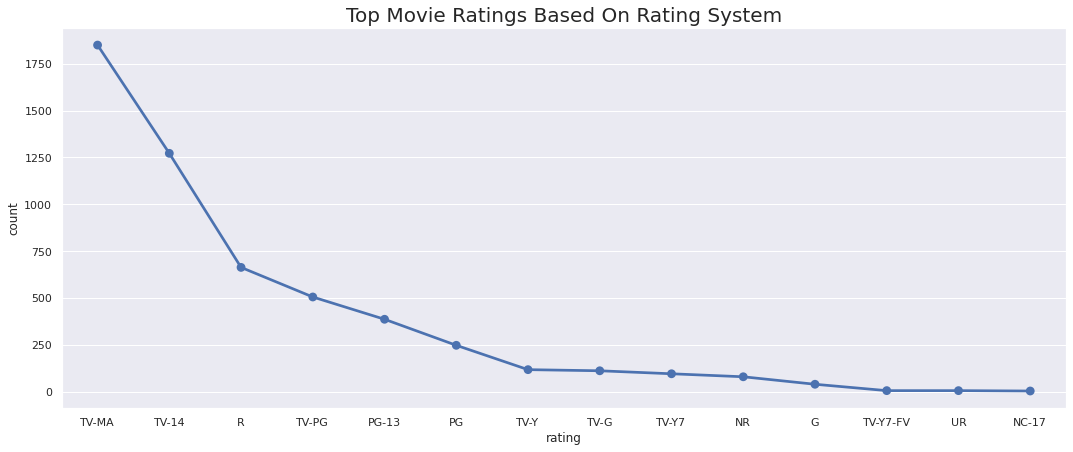

In [136]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

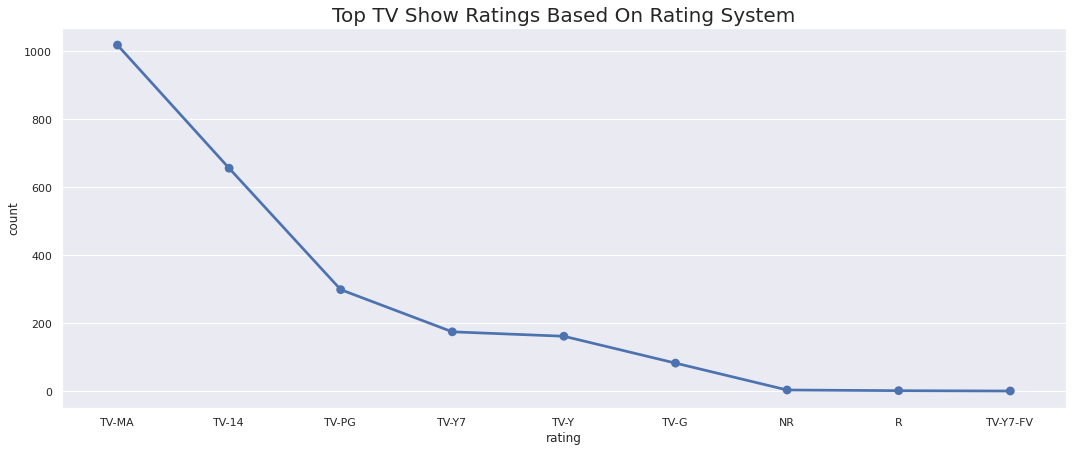

In [137]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

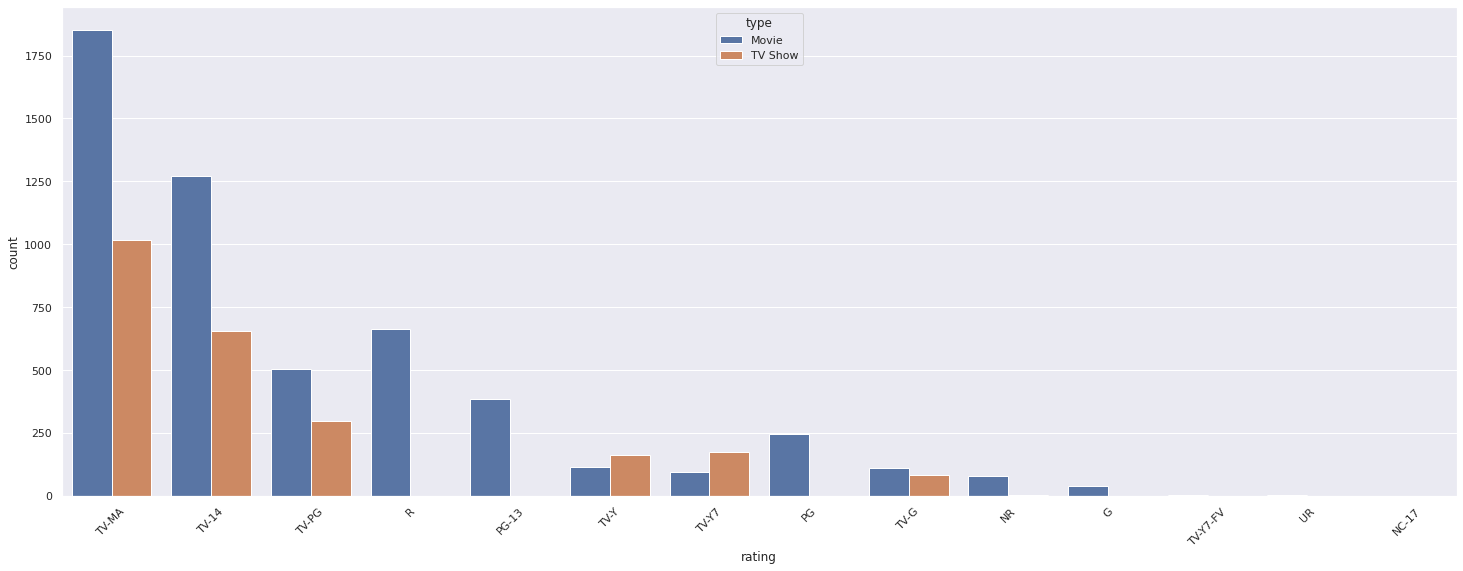

In [138]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= netflix_df,hue= "type",order = netflix_df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

In [139]:
top = netflix_df['country'].value_counts()[0:8]
top.index

Index(['United States', 'India', 'Unknown', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain'],
      dtype='object')

In [140]:
fig = px.pie(netflix_df,values = top,names = top.index,labels= top.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

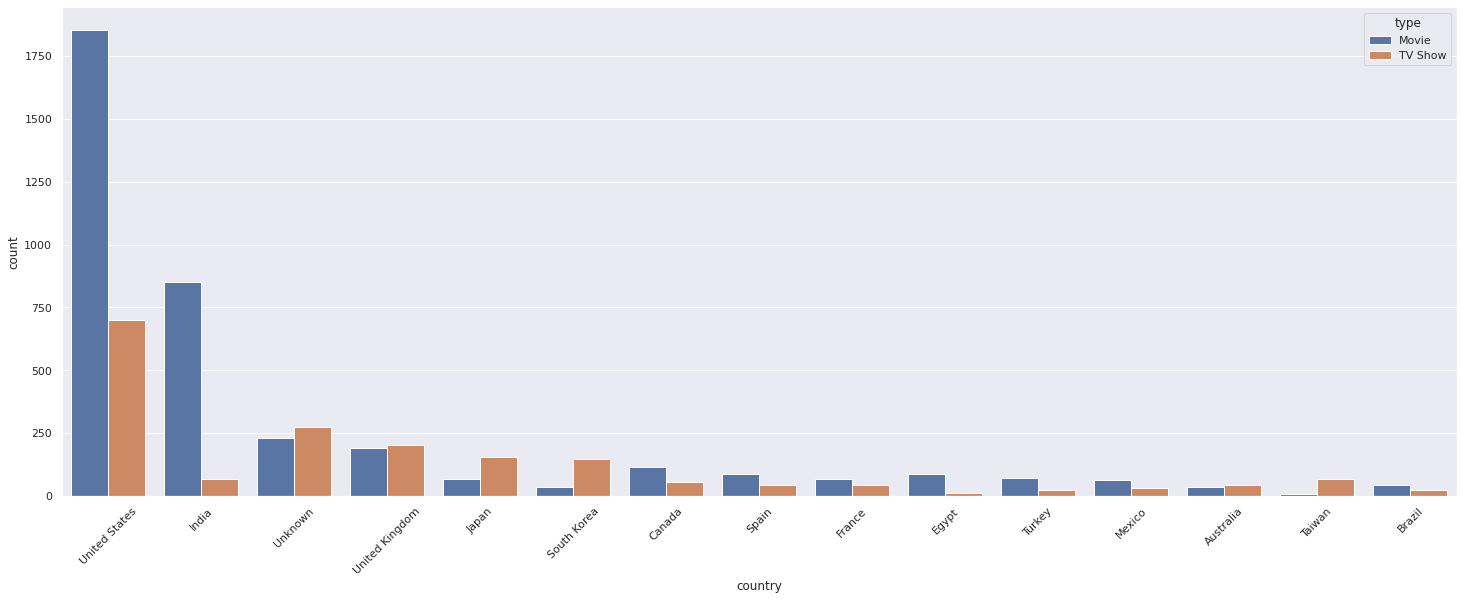

In [141]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= netflix_df,hue= "type",order = netflix_df['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

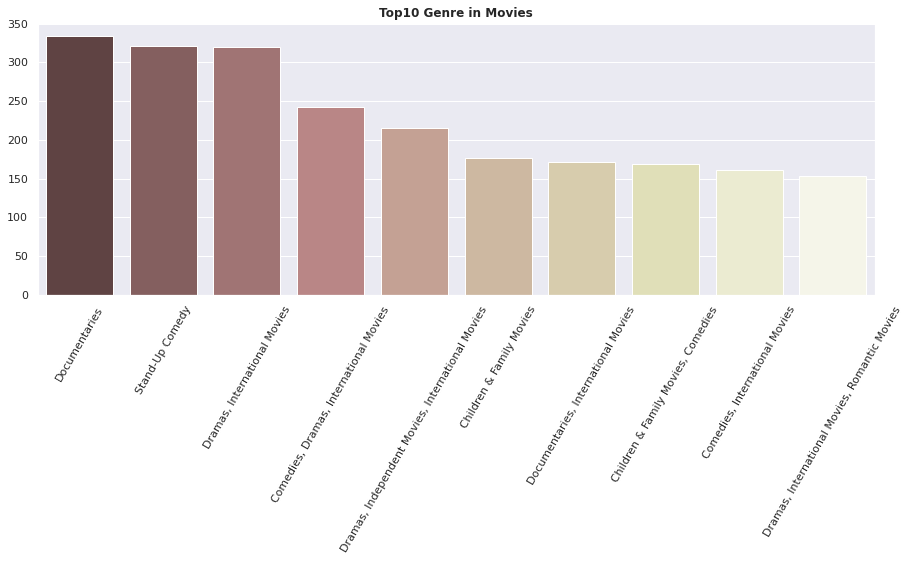

In [142]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

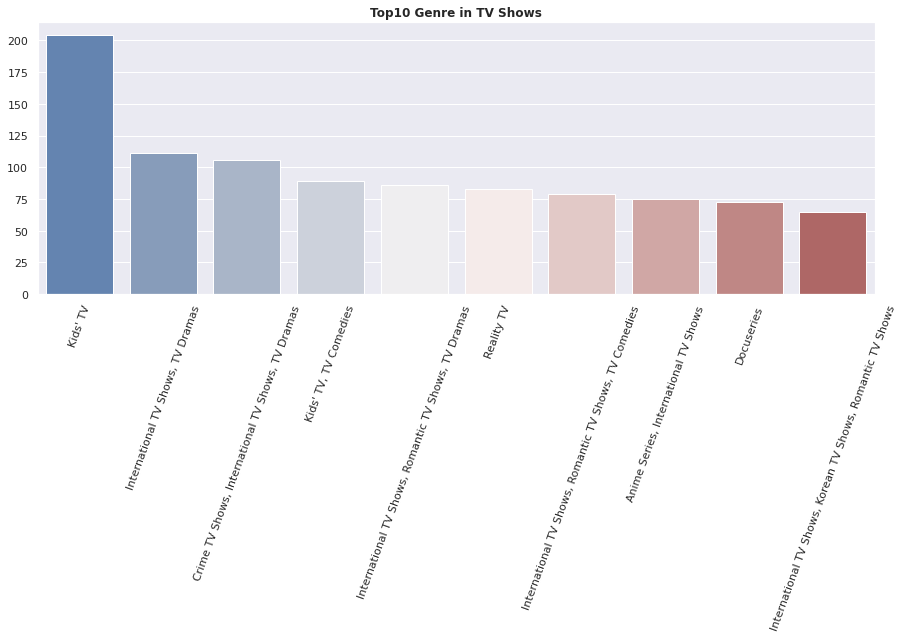

In [143]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

In [144]:
movies_duration = netflix_df[netflix_df['type'] == 'Movie'].filter(['duration'])
movies_duration['duration'] = movies_duration['duration'].map(lambda x: x.replace(' min', ''))
movies_duration['duration'] = pd.to_numeric(movies_duration['duration'])


fig = px.box(movies_duration, y="duration",)
fig.show()

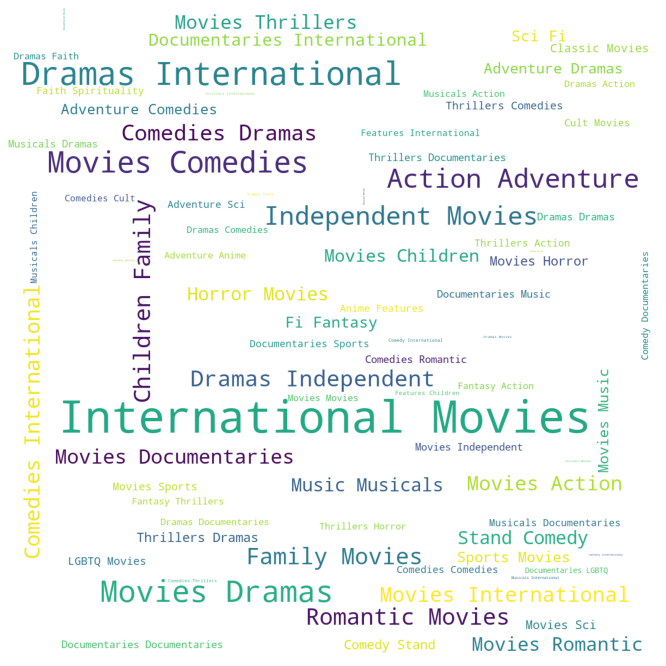

In [145]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

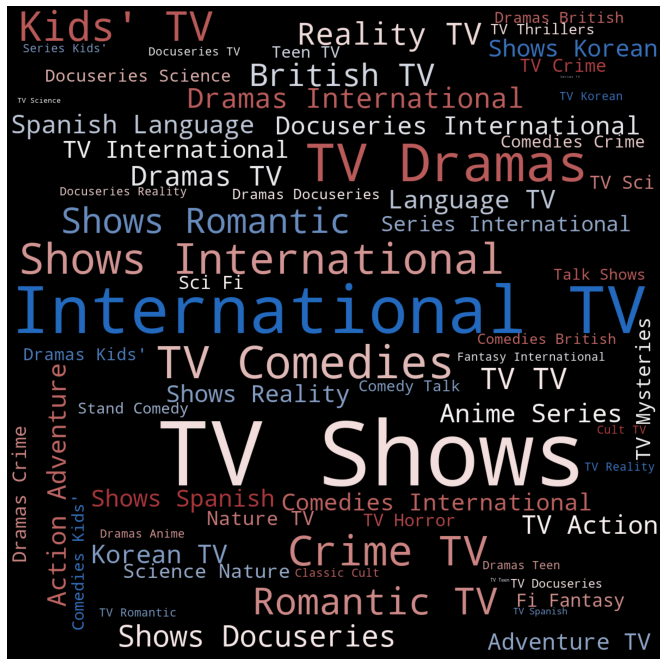

In [146]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
bow_transformer = CountVectorizer(analyzer = 'word').fit(netflix_df['description'])
desc_bow = bow_transformer.transform(netflix_df['description'])
print('Shape of the generated matrix : ',desc_bow.shape)
sparsity = desc_bow.nnz/(desc_bow.shape[0]*desc_bow.shape[1])*100.0
print('Sparsity of the generated matrix',round(sparsity,4))

Shape of the generated matrix :  (7777, 18156)
Sparsity of the generated matrix 0.1185


In [148]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country,year_added,month_added,age_rating
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,NaN


In [150]:
#mapping the multiple value cells into list type
netflix_df['directors'] = netflix_df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['genres'] = netflix_df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['actors'] = netflix_df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['countries'] = netflix_df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['all_features'] = netflix_df['directors'] + netflix_df['genres'] + netflix_df['actors'] + netflix_df['countries']
netflix_df['all_features'] = netflix_df['all_features'].apply(lambda x: " ".join(x))

In [152]:
# Finding TF and IDF metrics
vector = TfidfVectorizer(max_df=1.4, min_df=1,strip_accents = 'ascii', stop_words='english',lowercase=True,use_idf=True,norm=u'l2',smooth_idf=True)
tfidf = vector.fit_transform(netflix_df.all_features)

In [162]:
# Cluster the description data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import linear_kernel
#setting the no. of resulting clusters for kmeans
k = 400
kmeans = KMeans(n_clusters = k, init = 'k-means++')
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()
request_transform = vector.transform(netflix_df['all_features'])
# new column cluster based on the description
netflix_df['cluster'] = kmeans.predict(request_transform) 

0       169
1        63
2       114
3       238
4       231
       ... 
7782    312
7783     67
7784     67
7785    190
7786     12
Name: cluster, Length: 7777, dtype: int32

In [164]:
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country,year_added,month_added,age_rating,directors,genres,actors,countries,all_features,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,NaN,[Unknown],"[International_TV_Shows, TV_Dramas, TV_Sci-Fi_...","[João_Miguel, Bianca_Comparato, Michel_Gomes, ...",[Brazil],Unknown International_TV_Shows TV_Dramas TV_Sc...,169
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,NaN,[Jorge_Michel_Grau],"[Dramas, International_Movies]","[Demián_Bichir, Héctor_Bonilla, Oscar_Serrano,...",[Mexico],Jorge_Michel_Grau Dramas International_Movies ...,63
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,NaN,[Gilbert_Chan],"[Horror_Movies, International_Movies]","[Tedd_Chan, Stella_Chung, Henley_Hii, Lawrence...",[Singapore],Gilbert_Chan Horror_Movies International_Movie...,114
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,NaN,[Shane_Acker],"[Action_&_Adventure, Independent_Movies, Sci-F...","[Elijah_Wood, John_C._Reilly, Jennifer_Connell...",[United_States],Shane_Acker Action_&_Adventure Independent_Mov...,238
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,NaN,[Robert_Luketic],[Dramas],"[Jim_Sturgess, Kevin_Spacey, Kate_Bosworth, Aa...",[United_States],Robert_Luketic Dramas Jim_Sturgess Kevin_Space...,231
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Turkey,2017,July,NaN,[Serdar_Akar],"[International_TV_Shows, TV_Dramas, TV_Mysteries]","[Erdal_Beşikçioğlu, Yasemin_Allen, Melis_Birka...",[Turkey],Serdar_Akar International_TV_Shows TV_Dramas T...,44
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt,2020,June,NaN,[Yasir_Al_Yasiri],"[Horror_Movies, International_Movies]","[Amina_Khalil, Ahmed_Dawood, Tarek_Lotfy, Ahme...",[Egypt],Yasir_Al_Yasiri Horror_Movies International_Mo...,114
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,United States,2019,November,NaN,[Kevin_Reynolds],[Dramas],"[Samuel_L._Jackson, John_Heard, Kelly_Rowan, C...",[United_States],Kevin_Reynolds Dramas Samuel_L._Jackson John_H...,342
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",India,2019,April,NaN,[Shravan_Kumar],"[Horror_Movies, International_Movies]","[Divya_Dutta, Atul_Kulkarni, Mohan_Agashe, Anu...",[India],Shravan_Kumar Horror_Movies International_Movi...,381
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min

In [167]:
from sklearn.metrics import silhouette_score , silhouette_samples 


In [170]:
score = silhouette_score(request_transform, kmeans.labels_, metric='euclidean')

In [171]:
score

0.018447371566518447

In [174]:
samples = silhouette_samples(request_transform, kmeans.labels_, metric='euclidean')

In [175]:
samples

array([-1.57295657e-02, -7.13759107e-05, -2.38763212e-02, ...,
       -2.07005424e-03, -1.14764658e-01,  2.35274948e-02])